<a href="https://colab.research.google.com/github/simmy4946/IT-Related/blob/main/Cloud_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries..
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cloud_aws= pd.read_csv("/content/aws_cloud_service_analytics.csv")

**DATA PRE PROCCESSING..**

In [ ]:
# Check top 5 heads..
cloud_aws.head()


,Customer_ID,AWS_Service,Monthly_Cost_USD,Provisioned_Resources,Utilization_Percentage,Storage_Usage_GB,Data_Transfer_GB,Execution_Time_ms,Idle_Instances,Reserved_Instance_Utilization,Cost_Optimization_Suggestion
0,8270,ELB,4023.0,49,50.889056,125.0,297,4200,9,NaN,Terminate
1,1860,DynamoDB,NaN,46,36.928077,2105.0,434,4923,8,25.0,Terminate
2,6390,DynamoDB,2069.0,62,93.292486,1811.0,695,3089,9,75.0,Optimize
3,6191,RDS,NaN,8,82.750632,2156.0,690,4187,5,NaN,Terminate
4,6734,S3,991.0,43,69.720938,1630.0,197,4094,6,0.0,Terminate


In [ ]:
# see the shape of data..
cloud_aws.shape

(1050, 11)

In [ ]:
# see the size of data..
cloud_aws.size

11550

In [ ]:
# check the columns ..
cloud_aws.columns

Index(['Customer_ID', 'AWS_Service', 'Monthly_Cost_USD',
       'Provisioned_Resources', 'Utilization_Percentage', 'Storage_Usage_GB',
       'Data_Transfer_GB', 'Execution_Time_ms', 'Idle_Instances',
       'Reserved_Instance_Utilization', 'Cost_Optimization_Suggestion'],
      dtype='object')

In [ ]:
# check the dtypes..
cloud_aws.dtypes

,0
Customer_ID,int64
AWS_Service,object
Monthly_Cost_USD,float64
Provisioned_Resources,int64
Utilization_Percentage,float64
Storage_Usage_GB,float64
Data_Transfer_GB,int64
Execution_Time_ms,int64
Idle_Instances,int64
Reserved_Instance_Utilization,float64


In [ ]:
# see the summary of data..
cloud_aws.describe(include='all')

,Customer_ID,AWS_Service,Monthly_Cost_USD,Provisioned_Resources,Utilization_Percentage,Storage_Usage_GB,Data_Transfer_GB,Execution_Time_ms,Idle_Instances,Reserved_Instance_Utilization,Cost_Optimization_Suggestion
count,1050.000000,1050,948.000000,1050.000000,949.000000,941.000000,1050.000000,1050.000000,1050.000000,943.000000,1050
unique,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,S3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Terminate
freq,NaN,163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,224
mean,5570.448571,NaN,3137.902954,49.381905,48.522363,2522.993624,495.148571,2526.026667,4.558095,48.568399,NaN
std,2535.186698,NaN,4966.795728,28.013204,29.358780,1454.370783,290.480649,1427.986834,2.918818,36.707910,NaN
min,1004.000000,NaN,107.000000,1.000000,0.000000,21.000000,0.000000,62.000000,0.000000,0.000000,NaN
25%,3435.500000,NaN,1251.250000,26.000000,23.442560,1279.000000,236.000000,1262.250000,2.000000,25.000000,NaN
50%,5732.000000,NaN,2490.000000,48.000000,48.402057,2486.000000,507.000000,2492.000000,5.000000,50.000000,NaN
75%,7776.750000,NaN,3800.500000,73.000000,73.444393,3820.000000,746.500000,3811.750000,7.000000,75.000000,NaN


**REMOVE DUPLICATES..**

In [ ]:
cloud_aws.drop_duplicates(inplace=True)

In [ ]:
cloud_aws.shape

(1000, 11)

**CHECK AND HANDLING MISSING VALUES..**

In [ ]:
cloud_aws.isna().sum()

,0
Customer_ID,0
AWS_Service,0
Monthly_Cost_USD,100
Provisioned_Resources,0
Utilization_Percentage,96
Storage_Usage_GB,100
Data_Transfer_GB,0
Execution_Time_ms,0
Idle_Instances,0
Reserved_Instance_Utilization,100


In [ ]:
cloud_aws['Monthly_Cost_USD'].fillna(cloud_aws['Monthly_Cost_USD'].mean(), inplace=True)
cloud_aws['Utilization_Percentage'].fillna(cloud_aws['Utilization_Percentage'].mean(), inplace=True)
cloud_aws['Storage_Usage_GB'].fillna(cloud_aws['Storage_Usage_GB'].mean(), inplace=True)
cloud_aws['Reserved_Instance_Utilization'].fillna(cloud_aws['Reserved_Instance_Utilization'].mean(), inplace=True)



<ipython-input-69-f5c7a49c211a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cloud_aws['Monthly_Cost_USD'].fillna(cloud_aws['Monthly_Cost_USD'].mean(), inplace=True)
<ipython-input-69-f5c7a49c211a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col

In [ ]:
# check the null values are present in the data or not , there is no null values
cloud_aws.isna().sum()

,0
Customer_ID,0
AWS_Service,0
Monthly_Cost_USD,0
Provisioned_Resources,0
Utilization_Percentage,0
Storage_Usage_GB,0
Data_Transfer_GB,0
Execution_Time_ms,0
Idle_Instances,0
Reserved_Instance_Utilization,0


**NON GRAPHICAL ANALYSIS**

VALUE COUNTS

In [ ]:
cloud_aws['AWS_Service'].value_counts()

,count
AWS_Service,
S3,152
ELB,150
RDS,143
EC2,142
Lambda,139
DynamoDB,138
VPC,136


In [ ]:
cloud_aws['Monthly_Cost_USD'].value_counts()

,count
Monthly_Cost_USD,
3077.126667,100
3819.000000,3
3391.000000,3
1549.000000,3
3090.000000,3
...,...
2107.000000,1
293.000000,1
3001.000000,1


In [ ]:
cloud_aws['Provisioned_Resources'].value_counts()

,count
Provisioned_Resources,
47,19
28,18
13,17
17,16
51,15
...,...
52,5
83,5
14,4


In [ ]:
cloud_aws['Utilization_Percentage'].value_counts()

,count
Utilization_Percentage,
48.314621,96
0.000000,21
18.283778,1
28.570757,1
92.712378,1
...,...
90.177403,1
20.347274,1
87.735045,1


In [ ]:
cloud_aws['Storage_Usage_GB'].value_counts()

,count
Storage_Usage_GB,
2517.086667,100
1472.000000,4
1917.000000,4
3207.000000,3
1879.000000,3
...,...
3076.000000,1
987.000000,1
4915.000000,1


In [ ]:
cloud_aws['Data_Transfer_GB'].value_counts()

,count
Data_Transfer_GB,
555,4
254,4
293,4
852,4
545,4
...,...
855,1
858,1
784,1


In [ ]:
cloud_aws['Execution_Time_ms'].value_counts()

,count
Execution_Time_ms,
4404,4
4066,3
1657,3
2113,3
1552,3
...,...
4483,1
2220,1
496,1


In [ ]:
cloud_aws['Idle_Instances'].value_counts()

,count
Idle_Instances,
9,111
6,109
1,108
5,106
0,102
7,102
8,100
3,91
4,86


In [ ]:
cloud_aws['Reserved_Instance_Utilization'].value_counts()

,count
Reserved_Instance_Utilization,
0.0,224
100.0,179
50.0,167
25.0,165
75.0,165
47.5,100


In [ ]:
cloud_aws['Cost_Optimization_Suggestion'].value_counts()

,count
Cost_Optimization_Suggestion,
Terminate,213
No Action,209
Downgrade,197
Optimize,196
Upgrade,185


**What is the average monthly cost per AWS service?**

In [ ]:
avg_cost_per_service= cloud_aws.groupby('AWS_Service')['Monthly_Cost_USD'].mean().sort_values(ascending=False)
avg_cost_per_service

,Monthly_Cost_USD
AWS_Service,
ELB,3531.295956
Lambda,3413.475012
S3,3243.968947
RDS,3004.820140
DynamoDB,2857.240145
VPC,2722.943235
EC2,2715.262441


High-Cost Services: Easily identify which AWS services are contributing most to the monthly bill.

E.g., services like ELB, Lambda and S3 often appear near the top.

Cost Optimization Targets:

Services with high average costs are prime candidates for cost reviews.

Look into usage, right-sizing, or reserved instance options for these services.

Unexpected Costs:

You might discover services with unexpectedly high costs—possibly due to misconfiguration or overprovisioning.

Trend Monitoring:

Over time, comparing this output month-over-month can help track how cost per service evolves.

Finally, it provides a clear view of cost distribution across AWS services and serves as a starting point for cost reduction strategies and budgeting decisions.

**Which customers have the highest and lowest monthly AWS costs?**



In [ ]:
highest=cloud_aws['Monthly_Cost_USD'].max()
highest

48600.0

In [ ]:
lowest=cloud_aws['Monthly_Cost_USD'].min()
lowest

107.0

In [ ]:
sorted_df = cloud_aws.sort_values(by='Monthly_Cost_USD')

In [ ]:
lowest = sorted_df.head(1)
lowest

,Customer_ID,AWS_Service,Monthly_Cost_USD,Provisioned_Resources,Utilization_Percentage,Storage_Usage_GB,Data_Transfer_GB,Execution_Time_ms,Idle_Instances,Reserved_Instance_Utilization,Cost_Optimization_Suggestion
769,6401,Lambda,107.0,56,48.314621,1791.0,25,128,3,75.0,Terminate


In [ ]:
highest = sorted_df.tail(1)
highest

,Customer_ID,AWS_Service,Monthly_Cost_USD,Provisioned_Resources,Utilization_Percentage,Storage_Usage_GB,Data_Transfer_GB,Execution_Time_ms,Idle_Instances,Reserved_Instance_Utilization,Cost_Optimization_Suggestion
82,3027,Lambda,48600.0,66,63.228215,1919.0,537,1602,4,100.0,Optimize


This identifies the customers who incur the highest and lowest 'Monthly_Cost_USD' in the data. By sorting the cost data per customer, we can:

Spot high-spending customers, which may indicate large-scale usage, enterprise-grade services, or possible inefficiencies.

Identify low-spending customers, which could include small businesses, inactive accounts, or optimized usage.

conclusion:

Segmenting customers based on cloud spend (e.g., enterprise vs. startup).

Targeting high-value clients for premium support or custom cost-saving plans.

Investigating low spenders for underutilization or potential upsell opportunities.

The helps in understanding customer behavior, prioritizing support/resources, and designing tailored cloud strategies for different spending tiers.



**What is the distribution of monthly costs across all customers?**

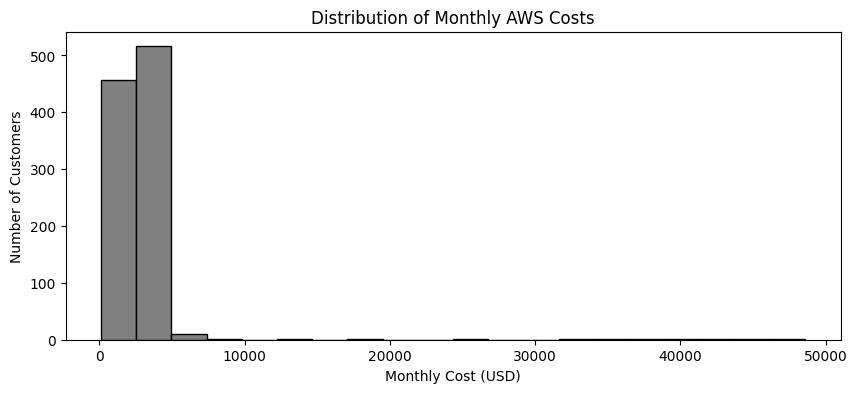

In [ ]:
plt.figure(figsize=(10, 4))
plt.hist(cloud_aws['Monthly_Cost_USD'], bins=20, color='grey', edgecolor='black')
plt.title('Distribution of Monthly AWS Costs')
plt.xlabel('Monthly Cost (USD)')
plt.ylabel('Number of Customers')
plt.show()

Insights:
The graph shows a highly right-skewed distribution of monthly AWS costs across customers:

*Most customers (~500+) have monthly AWS costs between $0 and $5,000.

*The majority are tightly clustered in the lower-cost brackets, suggesting many customers are small to mid-scale users.

*Very few customers have extremely high costs (e.g., $20,000 to $50,000), indicating a long tail of high spenders or enterprise-scale customers.

*The x-axis extends up to $50,000, but only a tiny fraction of customers reach those levels, as seen by the nearly flat bars on the right.

This helps in targeting cost-saving tools, promotions, or reserved pricing models towards the largest cluster of customers.

**Cost Analysis Is there a correlation between Monthly_Cost_USD and Utilization_Percentage?**

In [ ]:
correlation =cloud_aws['Monthly_Cost_USD'].corr(cloud_aws['Utilization_Percentage'])

In [ ]:
correlation

np.float64(0.014085436692529488)

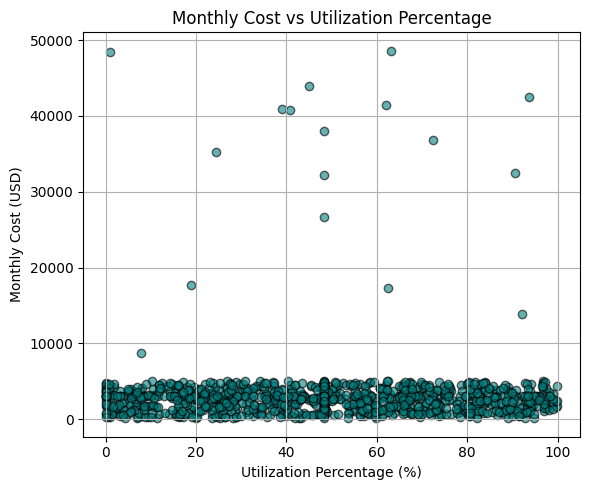

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(cloud_aws['Utilization_Percentage'], cloud_aws['Monthly_Cost_USD'], color='teal', alpha=0.6, edgecolors='black')

plt.title('Monthly Cost vs Utilization Percentage')
plt.xlabel('Utilization Percentage (%)')
plt.ylabel('Monthly Cost (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

It's very close to 0 means No real correlation.

This tells you that monthly cost and utilization percentage are mostly unrelated in data.

Highly Dispersed Cost Values:

The majority of data points are concentrated below $10,000, indicating that most customers operate within a controlled spending range.

However, there are several extreme high-cost outliers (above $30,000–$50,000), spread across a wide range of utilization levels (0–100%).

No Strong Linear Trend:

Visually, the scatter appears diffused, with no clear upward or downward pattern, suggesting that monthly cost is not strongly dependent on utilization percentage.

This aligns with a low or near-zero Pearson correlation, indicating weak linear association between cost and utilization.

Presence of Low Utilization + High Cost:

Critically, several points indicate low utilization (<30%) with very high costs, raising potential concerns of overprovisioned or idle infrastructure.

This is a strong signal for cost optimization interventions, such as rightsizing, auto-scaling, or decommissioning unused resources.

Utilization Saturation Without Cost Increase:

Many customers achieve high utilization (>80%) while maintaining relatively low cost. This demonstrates efficient resource consumption, likely benefiting from automation, reserved pricing, or workload optimization.

recommend:

Investigate outliers using identifiers (e.g., customer ID, service type).

Consider non-linear models or segmentation-based analysis (e.g., clustering) for deeper cost-efficiency classification.





**How does cost vary with the number of Provisioned_Resources?**

In [ ]:
cost_vary= cloud_aws.groupby('Provisioned_Resources')['Monthly_Cost_USD'].mean().sort_values()
cost_vary

,Monthly_Cost_USD
Provisioned_Resources,
27,1382.454545
52,1513.600000
13,1692.250196
33,1745.583704
50,1817.890833
...,...
38,6347.525333
26,6441.925333
41,7670.200000


This calculates the average monthly AWS cost for each level of Provisioned_Resources, sorted in ascending order of cost. It shows how costs vary depending on the amount of resources provisioned.

Insights:
Lower provisioned resources tend to be associated with lower average monthly costs, as expected.

As the number of provisioned resources increases, the average monthly cost also rises, showing a positive relationship.

However, the pattern may not be perfectly linear. Some mid-level provisioning groups might show unexpected spikes or efficiencies, depending on how well resources are utilized.

conclude:
High average cost at low resource levels could suggest underutilization or overpricing.

If very high provisioning leads to only moderate cost increases, it may indicate cost-effective scaling or reserved pricing.

**Do customers with high Idle_Instances also have high monthly costs?**

In [ ]:
correlate= cloud_aws['Idle_Instances'].corr(cloud_aws['Monthly_Cost_USD'])
correlate

np.float64(0.060940984887593724)

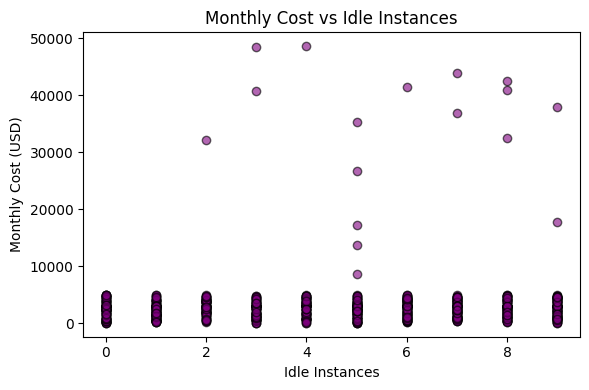

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(cloud_aws['Idle_Instances'], cloud_aws['Monthly_Cost_USD'], color='purple', alpha=0.6, edgecolors='black')

plt.title('Monthly Cost vs Idle Instances')
plt.xlabel('Idle Instances')
plt.ylabel('Monthly Cost (USD)')
plt.tight_layout()
plt.show()

“Having more idle instances doesn’t strongly affect monthly AWS costs across customers — other factors likely matter more (like provisioned size, data transfer, or reserved usage).”

This scatter plot illustrates the relationship between the number of Idle Instances and Monthly AWS Costs (USD) across different customers or accounts.

Insights:
Most data points are clustered at lower cost levels (under $5,000/month), regardless of the number of idle instances.

Several high-cost outliers (up to $50,000) exist even when idle instances are between 4 and 9, suggesting resource wastage.

The spread of idle instances (0–9) does not show a strong visible trend or linear correlation with cost.

Many customers are incurring significant costs despite having idle instances, which is a red flag.

Means:
Idle instances contribute to unnecessary spending — especially when they are present in high-cost accounts.

A lack of cost reduction despite idle resources indicates poor resource management or lack of auto-scaling.

This supports the case for automated idle resource detection and cleanup tools.

recommend:
Opportunity to optimize costs by terminating or consolidating idle resources.

Use this insight to create alerts or rules for customers exceeding a threshold of idle instances.

Ideal for cost governance dashboards or resource efficiency KPIs.




Which AWS services tend to have more Idle_Instances on average?

What’s the distribution of Storage_Usage_GB and how does it relate to Monthly_Cost_USD?**bold text**

**Which AWS services tend to have more Idle_Instances on average?**

In [ ]:
avg_idle_instances_by_service = cloud_aws.groupby('AWS_Service')['Idle_Instances'].mean().sort_values()
avg_idle_instances_by_service

,Idle_Instances
AWS_Service,
ELB,4.220000
EC2,4.323944
RDS,4.573427
S3,4.618421
VPC,4.742647
DynamoDB,4.775362
Lambda,4.928058


This is the average number of idle instances per AWS service. Services with higher idle instance averages may be underutilized, indicating opportunities to reduce waste and optimize costs, while lower values suggest more efficient resource usage.

**What’s the distribution of Storage_Usage_GB and how does it relate to Monthly_Cost_USD?**

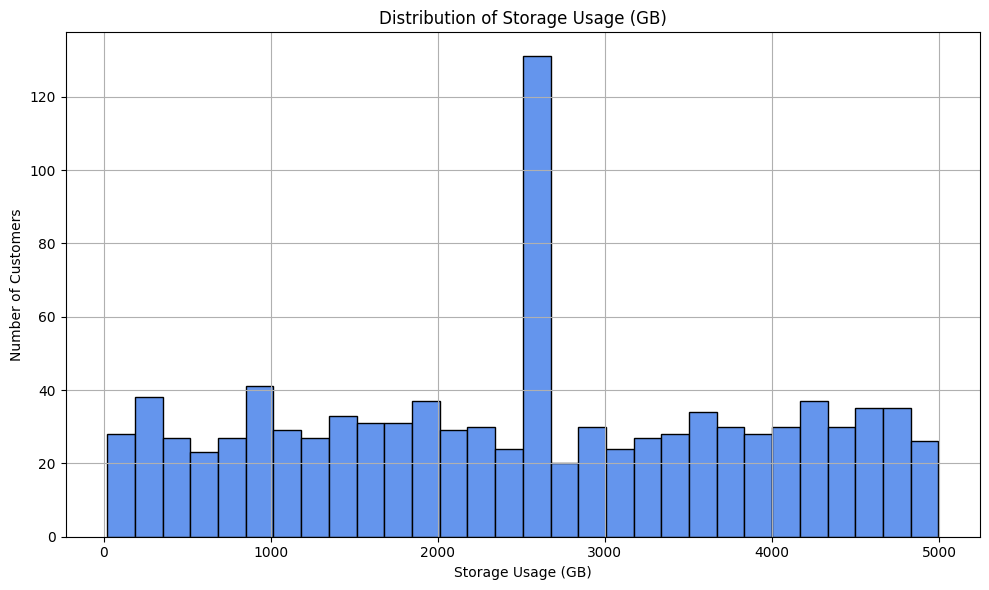

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(cloud_aws['Storage_Usage_GB'], bins=30, color='cornflowerblue', edgecolor='black')

plt.title('Distribution of Storage Usage (GB)')
plt.xlabel('Storage Usage (GB)')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.tight_layout()
plt.show()

Most customers have a moderate amount of storage that is close to the average. If you see a normal distribution, it means the usage is fairly balanced and not heavily skewed toward low or high values.

Fewer customers are using either very low or very high storage compared to the average. This suggests that extreme cases (both low and high storage) are relatively rare.

This graph shows how storage usage is distributed across customers in terms of gigabytes (GB). The x-axis shows the storage usage ranges, and the y-axis shows the number of customers within each range.

Insights:
Storage usage is spread fairly evenly across most ranges, indicating a diverse customer base with varying needs.

A notable spike occurs around the 2500 GB mark, with over 130 customers in that bin — significantly higher than all other intervals.

Outside of this spike, customer counts per bin mostly range between 25 and 40, suggesting a balanced distribution otherwise.

interpretation:
The sharp peak at 2500 GB could point to:

A default allocation setting or popular storage plan size.

Customers provisioning but not fully utilizing their assigned storage.

Tiered pricing behavior where users stay just under a threshold.

Effects:
The spike may need investigation for optimization or targeted pricing.

Storage products near 2500 GB should be monitored for overuse/underuse.

Consider offering customized storage plans around common usage levels.


**What is the average Reserved_Instance_Utilization across services?**

In [ ]:
avg_res_ins_utilization= cloud_aws.groupby('AWS_Service')['Reserved_Instance_Utilization'].mean().sort_values()
avg_res_ins_utilization

,Reserved_Instance_Utilization
AWS_Service,
ELB,45.033333
RDS,45.052448
EC2,45.510563
Lambda,46.348921
S3,47.631579
VPC,49.264706
DynamoDB,54.039855


This calculates the average utilization rate of Reserved Instances (RIs) for each AWS service, sorted in ascending order. It highlights which services are making the most — or least — efficient use of their reserved capacity.

Insights:
Low average RI utilization at the top of the list indicates services where reserved instances are underutilized, potentially leading to wasted costs.

High utilization services at the bottom suggest better capacity planning and cost efficiency.

Services vary widely, showing that some are harder to predict or manage in terms of usage.

Implications:
Focus optimization efforts on low-performing services by:

Reviewing instance reservation strategy.

Shifting workloads to on-demand or autoscaling where appropriate.

For high-performing services, consider expanding reservation use to lock in savings.



**Which customers are under-utilizing their reserved instances?**

In [ ]:
under_util_threshold = 50
under_utilizing_customers = cloud_aws[cloud_aws['Reserved_Instance_Utilization'] < under_util_threshold]
under_utilizing_customers

,Customer_ID,AWS_Service,Monthly_Cost_USD,Provisioned_Resources,Utilization_Percentage,Storage_Usage_GB,Data_Transfer_GB,Execution_Time_ms,Idle_Instances,Reserved_Instance_Utilization,Cost_Optimization_Suggestion
0,8270,ELB,4023.000000,49,50.889056,125.0,297,4200,9,47.5,Terminate
1,1860,DynamoDB,3077.126667,46,36.928077,2105.0,434,4923,8,25.0,Terminate
3,6191,RDS,3077.126667,8,82.750632,2156.0,690,4187,5,47.5,Terminate
4,6734,S3,991.000000,43,69.720938,1630.0,197,4094,6,0.0,Terminate
5,7265,S3,4570.000000,20,71.432664,4790.0,127,4376,9,25.0,No Action
...,...,...,...,...,...,...,...,...,...,...,...
993,7645,DynamoDB,4636.000000,68,75.728298,2420.0,760,1174,9,47.5,Upgrade
994,6083,DynamoDB,2240.000000,48,89.796465,1830.0,427,1271,5,25.0,Optimize
995,6232,RDS,1744.000000,52,8.412766,2974.0,116,2910,0,0.0,Downgrade
998,7016,Lambda,1555.000000,65,1.659248,2578.0,545,2560,8,47.5,No Action


It identifies the customers whose Reserved Instance (RI) utilization is below 50%, meaning they are using less than half of the reserved capacity they paid for.

Insights:
These customers are likely wasting money on unused reserved resources.

Low utilization could be caused by:

Over-reservation or poor forecasting.

Shifts in workload patterns.

Service changes or decommissioning without adjusting reservations.

It is neccessary because:
RI purchases are designed to reduce long-term cloud costs, but only if they're properly utilized.

Customers in this group are ideal candidates for:

Right-sizing consultations

Automation or scaling solutions

Switching to on-demand or savings plans instead of RIs.



**How does reserved instance utilization impact cost efficiency?**

In [ ]:
impact_cost_effiency= cloud_aws['Reserved_Instance_Utilization'].corr(cloud_aws['Monthly_Cost_USD'])
impact_cost_effiency

np.float64(0.02435578242480626)

It's very close to 0 (~0.02), which means the relationship is very weak or almost negligible.

This Reserved_Instance_Utilization and Monthly_Cost_USD to understand whether cost efficiency improves with better utilization of reserved instances.

Interpretation:

If the value is:

Positive and strong (close to +1): Higher RI utilization is associated with higher monthly costs, possibly due to well-planned capacity for large workloads.

Negative: Higher utilization is linked to lower costs, indicating cost efficiency gains through better reservation management.

Close to 0: Little to no linear relationship, suggesting other factors influence cost more than RI utilization.

concludes:
Helps evaluate if customers are saving money effectively through reserved capacity.

Useful for assessing cost-efficiency strategies in cloud resource planning.



**Is there a pattern between Data_Transfer_GB and Monthly_Cost_USD?**

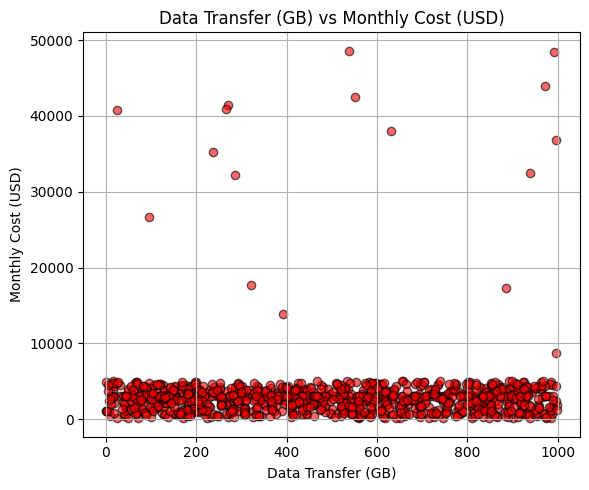

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(cloud_aws['Data_Transfer_GB'], cloud_aws['Monthly_Cost_USD'], color='red', alpha=0.6, edgecolors='black')
plt.title('Data Transfer (GB) vs Monthly Cost (USD)')
plt.xlabel('Data Transfer (GB)')
plt.ylabel('Monthly Cost (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

This scatter plot shows the relationship between data transfer volume (in GB) and monthly AWS costs (in USD) across customers or instances.

Insights:
Most data points are concentrated at lower cost levels (under $5,000) and across a wide range of data transfer volumes (0–1000 GB).

There are several high-cost outliers ($20,000–$50,000) spread across different levels of data transfer.

No strong upward trend is visible, indicating a weak or no linear correlation between data transfer and monthly cost.

Explaination:
Monthly cost is not directly driven by data transfer alone; other services (e.g., compute, storage) likely contribute more significantly to cost.

Customers with high costs but low data transfer may be using compute-heavy or storage-heavy services.

Conversely, customers transferring large volumes at low cost might benefit from data transfer-inclusive pricing models or reserved plans.

Effects:
Cost optimization strategies should not focus on data transfer alone.

Use this insight to identify cost anomalies, e.g., high transfer with low cost, or high cost with minimal transfer.

Could support tiered pricing models or recommendations for better use of bandwidth-efficient services.



**Which services involve the most data transfer or storage usage?**

In [ ]:
service_usage = cloud_aws.groupby('AWS_Service')[['Data_Transfer_GB', 'Storage_Usage_GB']].sum()

In [ ]:
most_data_transfer = service_usage.sort_values(by='Data_Transfer_GB', ascending=False)

In [ ]:
most_storage_usage = service_usage.sort_values(by='Storage_Usage_GB', ascending=False)

In [ ]:
most_data_transfer

,Data_Transfer_GB,Storage_Usage_GB
AWS_Service,,
EC2,75872,372477.386667
ELB,74254,377300.866667
S3,72577,384870.386667
VPC,70165,339040.386667
RDS,68021,344808.300000
DynamoDB,67445,344996.126667
Lambda,65226,353593.213333


In [ ]:
most_storage_usage

,Data_Transfer_GB,Storage_Usage_GB
AWS_Service,,
S3,72577,384870.386667
ELB,74254,377300.866667
EC2,75872,372477.386667
Lambda,65226,353593.213333
DynamoDB,67445,344996.126667
RDS,68021,344808.300000
VPC,70165,339040.386667


We Observed:

Top Services by Usage:
EC2 and ELB lead in data transfer, with over 74,000 GB each.

S3 ranks highest in storage usage at over 384,000 GB, highlighting its role as a core storage service.

Lambda and DynamoDB, while not leading in data transfer, have significant storage usage, indicating intensive data retention or processing.

Insights:
All listed services have very high storage usage, with each exceeding 339,000 GB, reflecting enterprise-scale workloads.

Data transfer volumes are also consistently high, showing active use of networking and application-level communication across services.

S3 is a clear leader in storage, while EC2 and ELB dominate data transfer, consistent with their typical roles (compute and load balancing).

Implications:
These services should be the primary targets for performance tuning, cost control, and capacity planning.

Consider archival strategies for S3, bandwidth optimization for EC2/ELB, and reserved capacity planning for consistent workloads.

Monitor usage trends to avoid over-provisioning and ensure resource efficiency across high-volume services.



**OUTLIERS DETECTION**

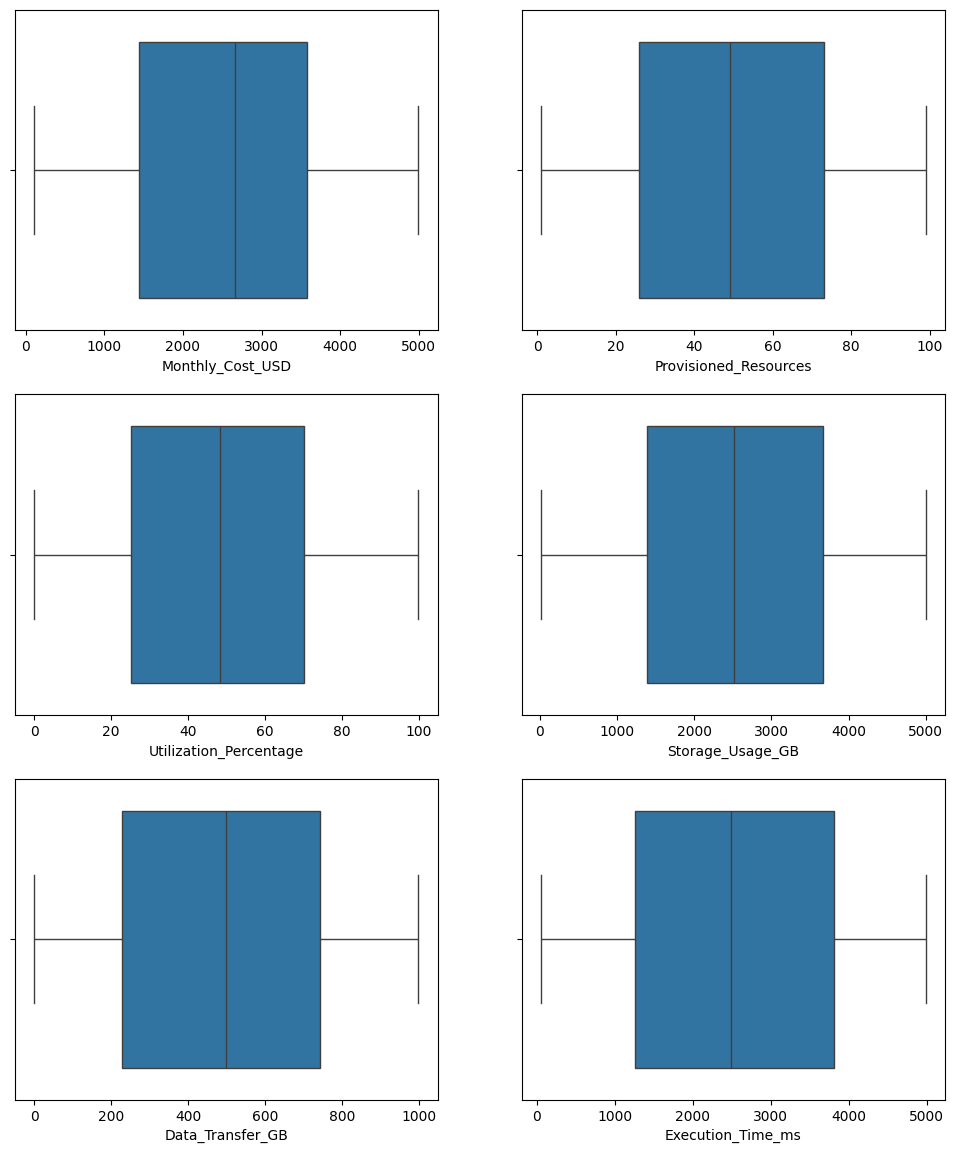

In [ ]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=cloud_aws, x="Monthly_Cost_USD", orient='h', ax=axis[0,0])
sns.boxplot(data=cloud_aws, x="Provisioned_Resources", orient='h', ax=axis[0,1])
sns.boxplot(data=cloud_aws, x="Utilization_Percentage", orient='h', ax=axis[1,0])
sns.boxplot(data=cloud_aws, x="Storage_Usage_GB", orient='h', ax=axis[1,1])
sns.boxplot(data=cloud_aws, x="Data_Transfer_GB", orient='h', ax=axis[2,0])
sns.boxplot(data=cloud_aws, x="Execution_Time_ms", orient='h', ax=axis[2,1])
plt.show()

1. Monthly_Cost_USD
Median monthly cost is around $2,500–$3,000.

No major outliers shown, but a wide range suggests varied spending across customers.

Distribution is relatively balanced, indicating a healthy mix of cost tiers.

2. Provisioned_Resources
Median provisioning is approximately 50 units.

Symmetrical box suggests even distribution of provisioned capacity.

Wide range implies different customer sizes or use cases.

3. Utilization_Percentage
Median utilization is around 50%, with values spanning the full 0–100% range.

Indicates that many customers may be underutilizing their resources, potentially wasting capacity.

4. Storage_Usage_GB
Median is roughly 2,500–3,000 GB, with consistent spread.

No heavy skewness, but a broad range means some customers store vastly more data than others.

5. Data_Transfer_GB
Median around 500 GB, showing more modest and balanced transfer usage.

Indicates majority of customers do moderate data movement, not very high-bandwidth workloads.

6. Execution_Time_ms
Median execution time is near 2,500–3,000 ms.

Spread indicates some variability in performance or workload duration.

Concludes:
Most metrics show balanced distributions with medians close to the center of the range.

There's no heavy outlier influence in these plots, meaning data is well-distributed.

Utilization and cost are prime candidates for optimization, especially where underutilization could be reducing cost efficiency.



<Axes: xlabel='Reserved_Instance_Utilization'>

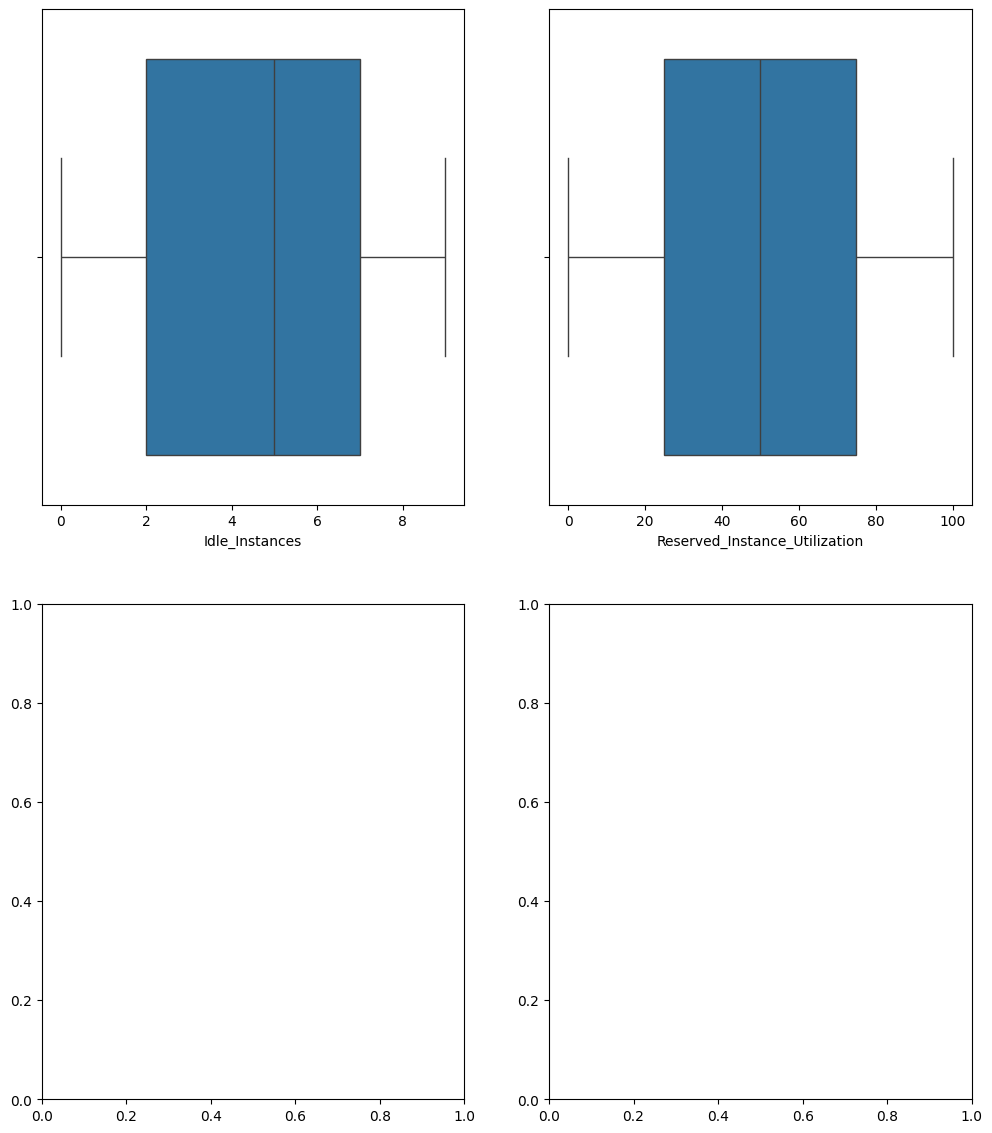

In [ ]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)
sns.boxplot(data=cloud_aws, x="Idle_Instances", orient='h', ax=axis[0,0])
sns.boxplot(data=cloud_aws, x="Reserved_Instance_Utilization", orient='h', ax=axis[0,1])

 Idle Instances
The number of idle instances ranges from 0 to 9, with the median around 5.

The distribution is fairly symmetrical, suggesting idle resources are common across the dataset.

 Insight: A significant portion of resources are underused, potentially leading to avoidable costs.

 Reserved Instance Utilization
Utilization spans the full range from 0% to 100%, with the median just above 50%.

This reflects uneven efficiency in how customers use reserved capacity.

 Insight: Many customers are likely not maximizing the benefits of their reserved instances, leading to cost inefficiency.

concludes:
High idle instance counts paired with low RI utilization point to misaligned resource provisioning.

Customers can benefit from:

Right-sizing resources.

Reviewing reservation strategies.

Using autoscaling or savings plans instead of RIs if workloads are inconsistent.

